# Investigating a Data Set using Python - a worked example

This notebook accompanies the program `analysis.py`, which performs exploratory data analysis, and creates plots, using the Fisher Iris data set. The code in this program is broken down here, with added comments, notes, and sources.

## Background - the Iris Data Set
### History and provenance
- Fisher's Iris Data Set is a collection of botanical measurements taken on three species of iris flower.
- The measurements were taken by botanist [Edgar Anderson](https://en.wikipedia.org/wiki/Edgar_Anderson), and published in [1936](https://doi.org/10.2307/2394164).
- The samples from the Versicolor and Setosa iris flowers were taken at same site at the Gaspé Peninsula, Quebec, in 1935.
- [Unwin & Kleinman](https://doi.org/10.1111/1740-9713.01589) date the Virginica iris samples to 1926, Tennesssee
- The iris data were famously used by [statistician and biologist Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) to demonstrate a method of statistical analysis ([Fisher, 1936](https://doi.org/10.1111/j.1469-1809.1936.tb02137.x).)

### Data set description
- The data set consists of measurements of 150 plants, 50 each of three species. Each plant has four measurements - sepal length, sepal width, petal length, and petal width, all in cm.

### Fame
- Considered the "hello world" of data sets, the Iris data set is extremely commonly used as a sample, "toy", or test dataset, in the fields of data science, statistics, data visualisation and machine learning. [According to the publisher's page](https://onlinelibrary.wiley.com/doi/10.1111/j.1469-1809.1936.tb02137.x), Fisher's paper has been cited over 9000 times.
- The Iris data set provides a useful set of labelled data for testing classification methods, algorithms and techniques.
- The data set is so frequently used that it is available as part of software packages such as [R base](https://www.geeksforgeeks.org/iris-dataset-in-r/) and [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html).

### Corruption
- The original version of the Iris data set available from the [UC Irving Machine Learning Repository](https://archive.ics.uci.edu/dataset/53/iris) contains two incorrect data points that are inconsistent with the data in Fisher's paper. The UCI repository now contains a corrected version named "bezdekiris.data", after [Bezdek et. al. (1999)](https://doi.org/10.1109/91.771092) pointed out these two incorrect points. In that correspondance, the authors note that there may be several varying sets of Iris data that have been used in publications over the last 90 years, and that comparing models using this data set requires a careful check that the data are correct. The UCI repository still contains its original, 'incorrect' data set, simply because it has been used so often and therefore may be needed to replicate results in future.  

***References***  
Anderson, E. (1936). The species problem in Iris. Annals of the Missouri Botanical Garden, 23(3), 457. https://doi.org/10.2307/2394164 

Bezdek, J. C., Keller, J. M., Krishnapuram, R., Kuncheva, L. I., & Pal, N. R. (1999). Will the real iris data please stand up?. IEEE Transactions on Fuzzy Systems, 7(3), 368-369. https://doi.org/10.1109/91.771092

Fisher, R. A. (1936). THE USE OF MULTIPLE MEASUREMENTS IN TAXONOMIC PROBLEMS. Annals of Eugenics, 7(2), 179–188. https://doi.org/10.1111/j.1469-1809.1936.tb02137.x  

Unwin, A., & Kleinman, K. (2021). The iris data set: In search of the source of virginica. Significance, 18(6), 26-29. https://doi.org/10.1111/1740-9713.01589  


## (1) Python Libraries Used
A number of Python libraries are included here to provide useful functions and tools.
- The [sys](https://docs.python.org/3/library/sys.html) library provides functions and variables that allow us to interact with the program's enviroment. For this program, it allows us to use [system exit functions](https://www.geeksforgeeks.org/python-exit-commands-quit-exit-sys-exit-and-os-_exit/).

- The [pandas](https://pandas.pydata.org/docs/index.html) library contains tools made specifically for data analysis and manipulation. Including it allows us to put our data into a Pandas DataFrame, which allows for easy data access, manupulation, and passing to plotting functions. 

- The [matplotlib](https://matplotlib.org) library contains tools to create plots and other data visualisations. This program uses the [Pyplot](https://matplotlib.org/stable/tutorials/pyplot.html) part of Matplotlib.

- The [seaborn](https://seaborn.pydata.org/) library is built on Matplotlib and extends its capabilities to create informative plots. Seaborn works particularly well with data stored in a Pandas DataFrame object.

In [1]:
# Library to allow file-handling
import sys
# Library for data analysis
import pandas as pd
# Libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## (2) Downloading and reading-in the dataset

- The Iris data are downloaded from the [UC Irving Machine Learning Repository](https://archive.ics.uci.edu/dataset/53/iris), which contains many well-known sample data sets used to develop and test data analysis tools.
- In the downloaded files, there are two sets of data: `iris.data` and `bezdekiris.data`. According to [Bezdek et. all (1999)](https://doi.org/10.1109%2F91.771092) the original UCI `iris.data` contains two data points that are inaccurate when compared to Fisher's 1936 data. After inspection, I determine that `bezdekiris.data` contains the corrected data, so this is the dataset I will use.


- If we look at the `bezdekiris.data` file, it contains the flower measurements without any labels. The accompanying `iris.names` text file tell us that the columns of numbers refer to sepal length, sepal width, petal length and petal width, with the fifth column recording the species of the iris.

In [2]:
# Looking at the Iris data file as it was downloaded
# open the file
with open ("bezdekiris.data", 'rt') as iris_file:

    # Read in the iris data and print it out without any modifications
    print(iris_file.read())

5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5.0,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa
5.4,3.7,1.5,0.2,Iris-setosa
4.8,3.4,1.6,0.2,Iris-setosa
4.8,3.0,1.4,0.1,Iris-setosa
4.3,3.0,1.1,0.1,Iris-setosa
5.8,4.0,1.2,0.2,Iris-setosa
5.7,4.4,1.5,0.4,Iris-setosa
5.4,3.9,1.3,0.4,Iris-setosa
5.1,3.5,1.4,0.3,Iris-setosa
5.7,3.8,1.7,0.3,Iris-setosa
5.1,3.8,1.5,0.3,Iris-setosa
5.4,3.4,1.7,0.2,Iris-setosa
5.1,3.7,1.5,0.4,Iris-setosa
4.6,3.6,1.0,0.2,Iris-setosa
5.1,3.3,1.7,0.5,Iris-setosa
4.8,3.4,1.9,0.2,Iris-setosa
5.0,3.0,1.6,0.2,Iris-setosa
5.0,3.4,1.6,0.4,Iris-setosa
5.2,3.5,1.5,0.2,Iris-setosa
5.2,3.4,1.4,0.2,Iris-setosa
4.7,3.2,1.6,0.2,Iris-setosa
4.8,3.1,1.6,0.2,Iris-setosa
5.4,3.4,1.5,0.4,Iris-setosa
5.2,4.1,1.5,0.1,Iris-setosa
5.5,4.2,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.2,Iris-setosa
5.0,3.2,1.2,0.2,Iris

- Instead of using this unlabelled data and having to remember which feature is which, we can read the data into a Pandas DataFrame structure. This allows us to supply labels to be stored with the data into the DataFrame. 

- This program reads the data into a Pandas DataFrame following this [example](https://www.angela1c.com/projects/iris_project/downloading-iris/).  
([Documentation for pandas.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas.read_csv))





In [3]:
# variable to hold Iris data filename
FILENAME = "bezdekiris.data"

# List of features (columns) in the data
feature_names = ["sepal length", "sepal width", "petal length", "petal width"]

with open (FILENAME, 'rt') as iris_file:

    # Create Pandas DataFrame from the iris data file.
    # Add column names manually as they are not present in the iris.data file.
    iris = pd.read_csv(
        iris_file, 
        names=feature_names + ["species"]
        )
    
# print out first 5 lines of dataframe
print(iris.head())

   sepal length  sepal width  petal length  petal width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


## (3) Data Analysis
### (3.1) Statistical summary of each feature, output to a single text file

Now that the dataset is in Pandas DataFrame format, we can get statistics of each feature in the data using the `pandas.DataFrame.describe()` method.  
[[Documentation for pandas.DataFrame.describe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe)]

In [4]:
# Show statistics of the data in the dataframe
iris.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


This statistical output can be written to a text file:

In [5]:
# variable to hold filename of text file to contain a summary of each feature
OUTPUT_FILENAME = "iris_stats.txt"

# print out dataframe statistics per feature, overwrite file if exists
with open (OUTPUT_FILENAME, 'w+t') as stats_file:
    print(iris.describe(), file=stats_file)

### (3.2) Save a histogram of each data feature to a png file

Histogram plots are useful to show the distributon of data points for each measured feature - are they tightly clustered or widely spread? are there any gaps in the distribution, or unusual outliers? 

For the Iris data, we can colour-code the histogram data by species, to compare the distributions of measurements between species. 

The code below:
- Creates a single plot comprising four subplots, one for each feature of the data, using [matplotlib.pyplot.subplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html),
- Uses the built-in function [enumerate](https://www.w3schools.com/python/ref_func_enumerate.asp) to count through the data features, making it easier to tell the program which subplot we are working on,
- Uses [Seaborn.histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) to plot each histogram,
- Specifies the 'species' column to be used to separate the histograms by species, and to colour-code them. Here, Seaborn chooses colours automatically, but I could also supply a list of colours of my own.


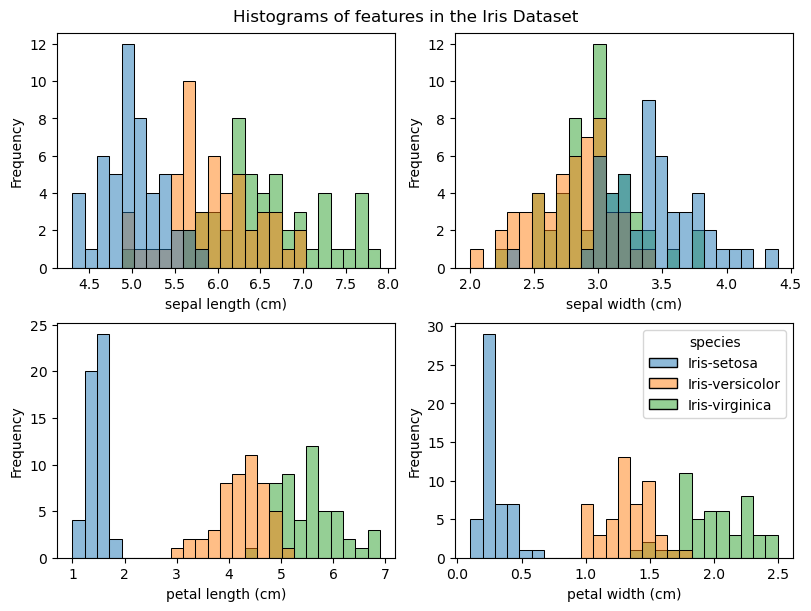

In [6]:
# Use Pyplot to create multiplot histogram of each feature in iris data
fig, ax = plt.subplots(2, 2, layout ='constrained', figsize=(8, 6)) 

# For each feature, by name
for index, feature in enumerate(feature_names):

    # set which subplot we are working on, counting from 1   
    plt.subplot(2, 2, index+1)
    
    # set number of bins 
    nbins = 25

    # Only plot the legend on the last subplot
    if index == 3:
        plot_legend_flag = True
    else:
        plot_legend_flag = False

    # Use Seaborn to plot histograms
    # ref: https://seaborn.pydata.org/generated/seaborn.histplot.html
    # As data for all targets is called in one plot command, the histogram
    # bins are the same across all three targets
    sns.histplot(
        iris, 
        x=feature,
        bins=nbins,
        hue='species',
        alpha=0.5,
        edgecolor='black',
        legend=plot_legend_flag
        )

    # Set the x-axis label to the feature name, plus units
    plt.xlabel(feature + " (cm)")

    # Set the y-axis label to frequency in the dataset
    plt.ylabel("Frequency")

# Set overall title
fig.suptitle("Histograms of features in the Iris Dataset");

When the histograms are plotted, we can see that there is a lot of overlap between the iris species when comparing distributions of sepal length and sepal width, and in comparison, the species of iris are much less overlapped when comparing distributions of petal length and petal width.

This implies that if you want to be able to distinguish between flowers of different species, it is more useful to compare petal measurements than sepal measurements. 

### (3.3) Scatter plot of one feature against another, plus linear regression model fits

[Scatter plots](https://en.wikipedia.org/wiki/Scatter_plot) are (typically) 
two-dimensional plots that illustrate the degree of correlation between two variables. 
The data are plotted as points on two orthogonal axes, with the value of one 
variable represented as position on the first axis, and the value of the
second variable represented by position on the second axis.   
In the below scatter plot, colour is used to provide additional class information.

The below scatterplot is created using [seaborn.scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html), and then a loop uses [seaborn.regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html) to overplot a linear regression model fit for each species of iris. 

(Ref: This approach was adapted from the code in this [comment to StackOverflow: seaborn regplot removes colors of datapoints](https://stackoverflow.com/a/66251601))

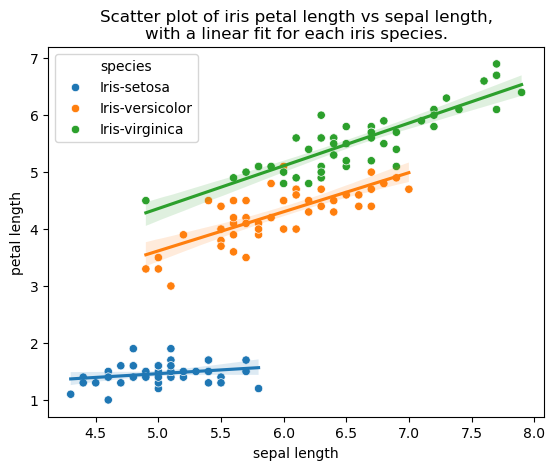

In [7]:
# Plot a demonstration scatter plot of petal length vs sepal length, with a linear fit for each species.
sns.scatterplot(
    iris, 
    x="sepal length", 
    y="petal length",
    hue="species"
    )

# for each unique value in the species coloum, plot a linear fit
for species in iris.species.unique():
    sns.regplot(
        iris[iris.species==species], 
        scatter=False,
        x="sepal length", 
        y="petal length",
        )

# add the title
plt.title(
    "Scatter plot of iris petal length vs sepal length,\n"
    "with a linear fit for each iris species."
);

### (3.4) Pairplot - All features compared to all other features

Seaborn can easily create a pairplot, which is a grid of smaller plots where each feature in the data is plotted against every other feature. The pairplot allows for the examination of the relationships of all features in 
the dataset, without having to create separate plots for each combination of
feature.  

For the Iris data, this will be a 4x4 grid. 

By default, [seaborn.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) creates scatter plots in each cell where a feature is compared with another feature, and along the diagonal cells, it creates a set of histograms. If a hue parameter is supplied, like we can for the Iris data, the pairplot diagonal will instead contain a set of [kernel density estimate (KDE)](https://en.wikipedia.org/wiki/Kernel_density_estimation)  plots for each feature. 

KDE is an estimate of the probability density function of each feature, 
for each species of iris. This continuous function describes the probability of a datapoint falling within a particular range of values, given the existing data. 
The KDE can be easier to interpret than a histogram  when comparing multiple overlapping distributions on the same plot.

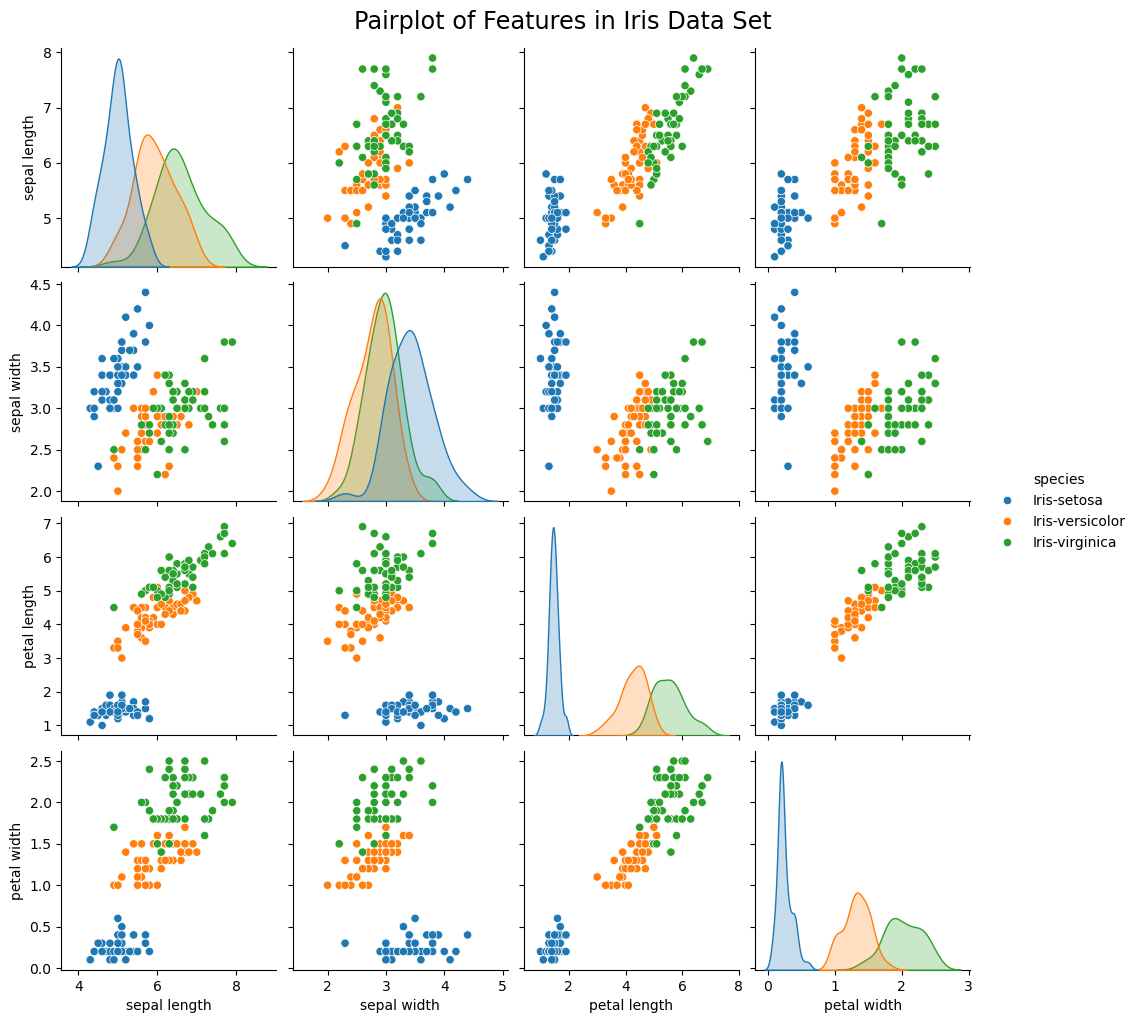

In [8]:
# Create Seaborn Pairplot
sns.pairplot(
    iris,
    hue='species', 
    )

# Add plot title
plt.suptitle("Pairplot of Features in Iris Data Set", y=1.02, size='xx-large');

## References, General
[GeeksforGeeks.org: Python exit commands: quit(), exit(), sys.exit() and os._exit()](https://www.geeksforgeeks.org/python-exit-commands-quit-exit-sys-exit-and-os-_exit/)